<a href="https://colab.research.google.com/github/espartaca75-prog/Optmizacion_dinamica_discreta/blob/main/COD_Euler_Ejemplo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo 6

---



In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# --- 1. CONFIGURACIÓN SIMBÓLICA ---
# Definimos los símbolos necesarios
st, ct, st_next, ct_next = sp.symbols('s_t c_t s_{t+1} c_{t+1}')
alpha, beta = sp.symbols('alpha beta')
Wt, Wt_next = sp.symbols('W_t W_{t+1}', cls=sp.Function)

# Definimos las funciones base f y g
f = sp.log(ct)                      # Utilidad instantánea
g = alpha * (st - ct)               # Ecuación de movimiento: st+1

Wt_st = f + beta * Wt_next(st_next)
print ("El problema a resolver es Wt(st)=")
print(f"{Wt_st} sugeto a s_t+1={g}")

El problema a resolver es Wt(st)=
beta*W_{t+1}(s_{t+1}) + log(c_t) sugeto a s_t+1=alpha*(-c_t + s_t)


In [3]:
#=== ALGORITMO DE DESCUBRIMIENTO DE LA ECUACIÓN DE EULER ===

# PASO 1: Derivación de la Condición de Primer Orden (CPO)
# dWt/dct = df/dct + beta * dWt+1/dst+1 * dst+1/dct = 0
deriv_f_ct = sp.diff(f, ct)
deriv_g_ct = sp.diff(g, ct)
cpo_expr = sp.Eq(deriv_f_ct + beta * sp.Symbol('dW_{t+1}/ds_{t+1}') * deriv_g_ct, 0)

print ("La condición de primer orden es dW_{t}/dc_{t}:")
cpo_expr

La condición de primer orden es dW_{t}/dc_{t}:


Eq(-alpha*beta*dW_{t+1}/ds_{t+1} + 1/c_t, 0)

In [4]:
# Despejamos de la CPO el valor futuro marginal
valor_futuro_marginal = sp.solve(cpo_expr, sp.Symbol('dW_{t+1}/ds_{t+1}'))
print(f"Expresión dWt+1/dst+1 hallada: ")
valor_futuro_marginal[0]

Expresión dWt+1/dst+1 hallada: 


1/(alpha*beta*c_t)

In [5]:
# PASO 2: Derivación de la Ecuación de Benveniste-Scheinkman (Teorema de la Envolvente)
# dWt/dst = df/dst + beta * dWt+1/dst+1 * dst+1/dst
deriv_f_st = sp.diff(f, st)
deriv_g_st = sp.diff(g, st)
bs= sp.Eq (sp.Symbol('dW_{t}/ds_{t}'),deriv_f_st + beta * sp.Symbol('dW_{t+1}/ds_{t+1}') * deriv_g_st )

print(f"Ecuación de Benveniste-Scheinkman")

bs

Ecuación de Benveniste-Scheinkman


Eq(dW_{t}/ds_{t}, alpha*beta*dW_{t+1}/ds_{t+1})

In [6]:
#Reemplazando la el valor futuro marginal en la Ecuación de Benveniste-Scheinkman
bs_2 = deriv_f_st + beta * valor_futuro_marginal[0] * deriv_g_st
print("dWt/dst=")
bs_2

dWt/dst=


1/c_t

In [7]:
#PASO 3: ADELANTO TEMPORAL DE B Y S
bs_3 = bs_2.subs(ct, ct_next)
bs_3

1/c_{t+1}

In [8]:
# PASO 4: SUSTITUCIÓN FINAL EN CPO
# reemplazamos bs_3 en la CPO original y encontramos la ec. de Euler
euler=cpo_expr.subs(sp.Symbol('dW_{t+1}/ds_{t+1}'), bs_3)
euler


Eq(-alpha*beta/c_{t+1} + 1/c_t, 0)

In [9]:
#despejamos ct+1
euler_descubierta = sp.solve(euler, ct_next)
print(f"La ecuación de Euler es {ct_next}=")
euler_descubierta[0]

La ecuación de Euler es c_{t+1}=


alpha*beta*c_t

In [10]:
# === RESOLUCIÓN DEL SISTEMA DE ECUACIONES EN DIFERENCIAS ===
# definimos los símbolos necesarios
t = sp.symbols('t', integer=True)
T_sym = sp.symbols('T', integer=True)
s0_sym, c0_sym = sp.symbols('s_0 c_0')
s_func = sp.Function('s')
c_func = sp.Function('c')

In [11]:
#Resolvemos la ecuación de Euler
#reescribimos la ecuación en términos de  c_func(t+1) y c_func(t)
euler_ec = sp.Eq(c_func(t+1), alpha*beta*c_func(t))

#resolvemos
sol_euler = sp.rsolve(euler_ec, c_func(t), {c_func(0): c0_sym})
sol_euler

c_0*(alpha*beta)**t

In [12]:
# Ecuación de Movimiento: s(t+1) = alpha * (s(t) - c(t))
mov_eq = sp.Eq(s_func(t+1), alpha * (s_func(t) - sol_euler))
sol_s_gen = sp.rsolve(mov_eq, s_func(t), {s_func(0): s0_sym})
sol_s_gen

alpha**t*(beta*s_0 + c_0 - s_0)/(beta - 1) - c_0*(alpha*beta)**t/(beta - 1)

In [13]:
# Determinamos c0 usando la Condición Terminal: s(T+1) = 0
cond_terminal = sp.Eq(sol_s_gen.subs(t, T_sym + 1), 0)
c0_descubierto = sp.solve(cond_terminal, c0_sym)
print("Consumo inicial (c0) descubierto para liquidación terminal:")
c0_descubierto[0]


Consumo inicial (c0) descubierto para liquidación terminal:


s_0*(beta - 1)/(beta**(T + 1) - 1)

 Periodo  Riqueza (st)  Consumo (ct)
       0     100000.00      40145.65
       1      65839.79      26496.13
       2      43278.03      17487.44
       3      28369.64      11541.71
       4      18510.72       7617.53
       5      11982.51       5027.57
       6       7650.43       3318.20
       7       4765.46       2190.01
       8       2833.00       1445.41
       9       1526.35        953.97
      10        629.62        629.62


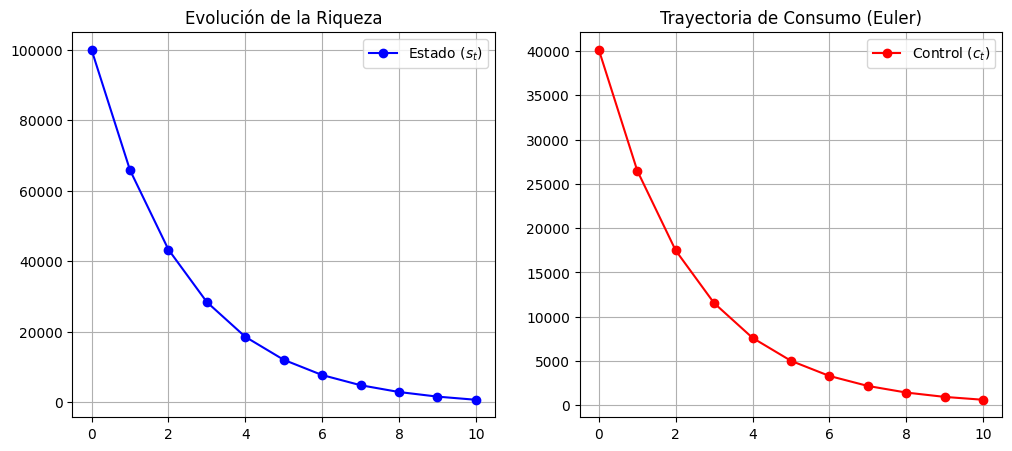

In [14]:
# === EJEMPLO Y TRAYECTORIAS ===
# Parámetros del ejemplo
horizonte = 10
riqueza_inicial = 100000.0
val_alpha = 1.1  # Tasa de retorno
val_beta = 0.60   # Factor de descuento (impaciencia)

# Sustituimos valores numéricos en la fórmula de c0
c0_num = float(c0_descubierto[0].subs({s0_sym: riqueza_inicial, alpha: val_alpha, beta: val_beta, T_sym: horizonte})) # Fixed: Access the first element of the list

# Generamos las trayectorias
c_hist = [c0_num * (val_alpha * val_beta)**i for i in range(horizonte + 1)]
s_hist = [riqueza_inicial]
for i in range(horizonte):
    s_hist.append(val_alpha * (s_hist[-1] - c_hist[i]))

# Visualización
df = pd.DataFrame({'Periodo': range(horizonte + 1), 'Riqueza (st)': s_hist, 'Consumo (ct)': c_hist})
print(df.to_string(index=False, float_format="%.2f"))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(s_hist, 'bo-', label='Estado ($s_t$)')
plt.title('Evolución de la Riqueza'); plt.grid(True); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(c_hist, 'ro-', label='Control ($c_t$)')
plt.title('Trayectoria de Consumo (Euler)'); plt.grid(True); plt.legend()
plt.show()